In [14]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [45]:
#path_to_mtrx = '/home/gabridele/Desktop/connectome_sub-100610.csv'
path_to_mtrx = '/Users/gabrieledele/Desktop/Hub_identification/gabriele_sc_connectomes/connectome_sub-100610.csv'
original_matrix = np.loadtxt(path_to_mtrx, delimiter=',')
resized_matrix = original_matrix[:100, :100]
print(resized_matrix.shape)

(100, 100)


Iteration 1: Number of active nodes = 3
Iteration 2: Number of active nodes = 32
Iteration 3: Number of active nodes = 453
Iteration 4: Number of active nodes = 1054
Simulation complete.


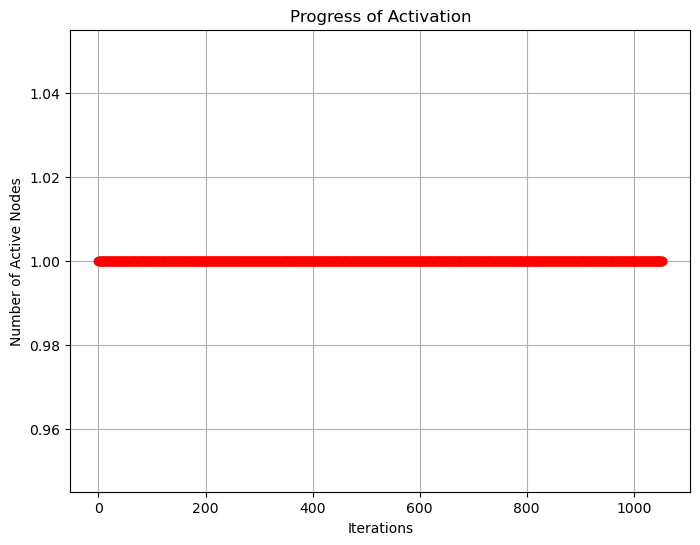

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Load the connectivity matrix from a CSV file
def load_connectivity_matrix(file_path):
    return np.loadtxt(file_path, delimiter=',')

# Set the activation threshold
activation_threshold = 0.008

# Select seed nodes randomly
def select_seed_nodes(num_nodes, num_seeds):
    return np.random.choice(num_nodes, num_seeds, replace=False)

def simulate_activation(connectivity_matrix, seed_nodes):
    num_nodes = connectivity_matrix.shape[0]
    active_nodes = np.zeros(num_nodes, dtype=bool)
    active_nodes[seed_nodes] = True
    
    iteration = 0  # Initialize iteration counter
    
    while not np.all(active_nodes):
        new_active_nodes = np.zeros(num_nodes, dtype=bool)
        for node_idx in range(num_nodes):
            if not active_nodes[node_idx]:
                neighbors = connectivity_matrix[node_idx]
                neighbors_activated = active_nodes[np.where(neighbors > 0)[0]]
                degree_of_node = np.sum(connectivity_matrix[node_idx] > 0)  # Calculate degree of the node
                activation_condition = activation_threshold * degree_of_node < np.sum(neighbors_activated)
                if activation_condition:
                    new_active_nodes[node_idx] = True
        active_nodes = np.logical_or(active_nodes, new_active_nodes)

        
        iteration += 1
        print(f"Iteration {iteration}: Number of active nodes = {np.sum(active_nodes)}")
    
    print("Simulation complete.")
    return active_nodes

# Main function
def main():
    # Load the connectivity matrix
    connectivity_matrix = original_matrix
    
    # Select seed nodes
    num_nodes = connectivity_matrix.shape[0]
    num_seeds = 1
    seed_nodes = select_seed_nodes(num_nodes, num_seeds)
    
    # Simulate activation
    activated_nodes_counts = simulate_activation(connectivity_matrix, seed_nodes)
    
    # Plot the results (Iterations vs. Number of Active Nodes)
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(activated_nodes_counts)), activated_nodes_counts, marker='o', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Number of Active Nodes')
    plt.title('Progress of Activation')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()